In [1]:
print("187159 SHANU KUMAR ")
print("LAB ASSIGNMENT 2")

187159 SHANU KUMAR 
LAB ASSIGNMENT 2


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def predict_adaline(X,weights):
  prediction = np.dot(weights,X)
  if prediction>0:
    return 1
  return 0

In [9]:
X= np.array([
               [1,0,0],
               [1,0,1],
               [1,1,0],
               [1,1,1]
               ])

In [10]:
def adaline_model(X,y,weights,learning_rate,epochs):
  for _ in range(epochs):
    MSE=0
    for feature,correct in zip(X,y):
      output = np.dot(weights,feature)
      error = correct-output
      MSE +=error**2

      #Updating Weights
      weights[0]+=learning_rate*error
      weights[1]+=feature[1]*learning_rate*error
      weights[2]+= feature[2]*learning_rate*error
    MSE /=X.shape[1]
    print("MSE : ",MSE)
  
  return weights
      



In [11]:
def plotGraph(weights,X,y):
  x1=[0,1]
  m=-weights[1]/weights[2]
  c=-weights[0]/weights[2]
  x2=np.asarray(x1)*m+c
  color=[]
  for i in y:
    if(i==1):
      color.append("blue")
    else:
      color.append("red")
  for i in range(4):
   plt.scatter(X[i][1],X[i][2],c=color[i],s=100,linewidth=0)
  plt.plot(x1,x2)
  plt.show()

## AND Gate

MSE :  624.9961653333334
MSE :  84.43391614319272
MSE :  43.1832177565821
MSE :  30.19642906188228
MSE :  22.13597810104814
MSE :  16.37442391818829
MSE :  12.143486058346918
MSE :  9.019610241397698
MSE :  6.7103140274851825
MSE :  5.0025218098592426
MSE :  3.739257813687454
MSE :  2.8046036631406364
MSE :  2.112911256177927
MSE :  1.600884930464604
MSE :  1.221741431153767
Weights for AND logic : 
[-1.60580323  1.39319021  1.44719722]


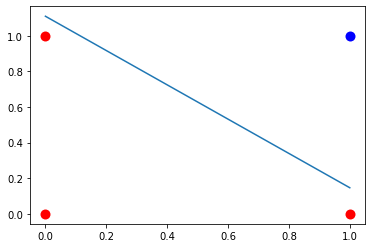

In [12]:
 # define AND logic gate outputs
y = [0,0,0,1]
#train weights
weights_AND= np.array([-30,.30,.30])
weights_AND = adaline_model(X,y,weights_AND,0.2,15)
print("Weights for AND logic : ")
print(weights_AND)
plotGraph(weights_AND,X,y)

## OR Gate

MSE :  100.98423199999998
MSE :  31.003664540622072
MSE :  12.96066315190018
MSE :  7.671774301667941
MSE :  5.6897462768131755
MSE :  4.663363328472049
MSE :  3.9723688992299984
MSE :  3.4357162405030173
MSE :  2.9914591976851916
MSE :  2.613408744362221
MSE :  2.2876910122911984
MSE :  2.005418044427412
MSE :  1.760095053758479
MSE :  1.5465808969277566
MSE :  1.3606183094184
MSE :  1.1985948273700602
MSE :  1.0574051728004112
MSE :  0.9343618436865319
MSE :  0.827130647302574
MSE :  0.7336805147001858
Weights for OR  
[-0.79491354  1.21655812  1.28951521]


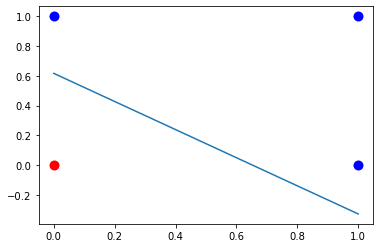

In [14]:
y = [0,1,1,1] #output labels for OR gate
#train weights
weights_OR= np.array([-10,.30,.30])
weights_OR = adaline_model(X,y,weights_OR,0.1,20)
print("Weights for OR  ")
print(weights_OR)
plotGraph(weights_OR,X,y)

## Multilevel Adaline for XOR

In [19]:
#here we can not get XOR using single layer so we will use multilayer
Y_NAND = [1,1,1,0] #output labels for NAND gate
#train weights
weights_NAND= np.array([100,0.25,0.25])
weights_NAND = adaline_model(X,Y_NAND,weights_NAND,0.3,15)

Y1=[]
Y2=[]
for i in range(len(X)):
  Y1.append(predict_adaline(weights_NAND,X[i]))
  Y2.append(predict_adaline(weights_OR,X[i]))

X_xor=pd.DataFrame({'a':np.full(len(Y1),1),'b':Y1,'c':Y2})
Y_xor=[]

for i in range(len(X_xor)):
  prediction = predict_adaline(X_xor.iloc[i,:],weights_AND)
  Y_xor.append(prediction)
  print(X_xor.iloc[i,1:3].to_string(index=False,header=False),end = ' \n output = ')
  print(prediction, "\n")




MSE :  5669.483868666666
MSE :  507.3790030597752
MSE :  286.87582315812597
MSE :  171.67596114639912
MSE :  103.03062635013049
MSE :  61.92443424934738
MSE :  37.28167826928549
MSE :  22.494949189735795
MSE :  13.614515711814944
MSE :  8.276575133600696
MSE :  5.0650726501840175
MSE :  3.130986705946199
MSE :  1.9648823280017762
MSE :  1.2608684098730214
MSE :  0.8351455776184645
 1
 0 
 output = 0 

 1
 1 
 output = 1 

 1
 1 
 output = 1 

 0
 1 
 output = 0 



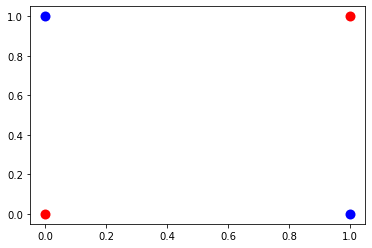

In [17]:
color=[]
for i in Y_xor:
  if(i==1):
    color.append("blue")
  else:
    color.append("red")
for i in range(4):
  plt.scatter(X[i][1],X[i][2],c=color[i],s=100,linewidth=0)